<a href="https://colab.research.google.com/github/adityaharshsingh7/Elevate-labs-internship-29-4-25-/blob/main/Elevate_labs_internship_29_4_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)
df = pd.read_csv(path +'/data.csv')
df.head()

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.drop(columns=['Unnamed: 32','id'], inplace=True)

In [11]:
df.diagnosis = [1 if value == 'M' else 0 for value in df.diagnosis]

Text(0, 0.5, 'Counts')

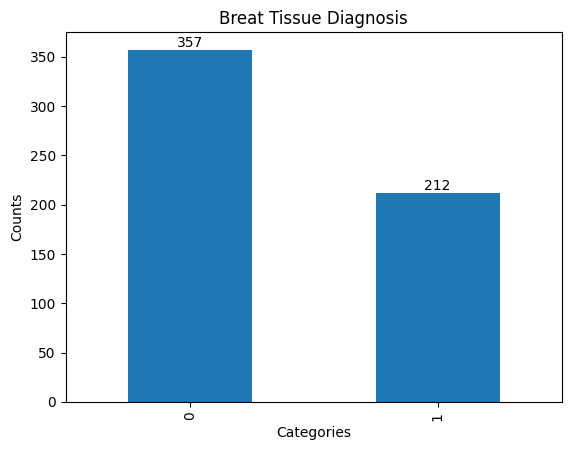

In [12]:
from itertools import count
df['diagnosis'] = df['diagnosis'].astype('category',copy=False)
df['diagnosis'].value_counts().plot(kind='bar')
count = df['diagnosis'].value_counts()
for i in range(len(count)):
    plt.text(i, count[i], str(count[i]), ha='center', va='bottom')
plt.title('Breat Tissue Diagnosis')
plt.xlabel('Categories')
plt.ylabel('Counts')

In [13]:
y = df['diagnosis']
X = df.drop(columns='diagnosis', axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_scaled = scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=50)

In [16]:
def score(a,b):
  print(accuracy_score(a,b))
  print(classification_report(a,b))
  print(confusion_matrix(a,b))
  print(roc_auc_score(a,b))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay

# Initialize the model
model = LogisticRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
# Evaluate the model
score(y_test,y_pred)



0.9707602339181286
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       112
           1       0.97      0.95      0.96        59

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[110   2]
 [  3  56]]
0.9656476997578692


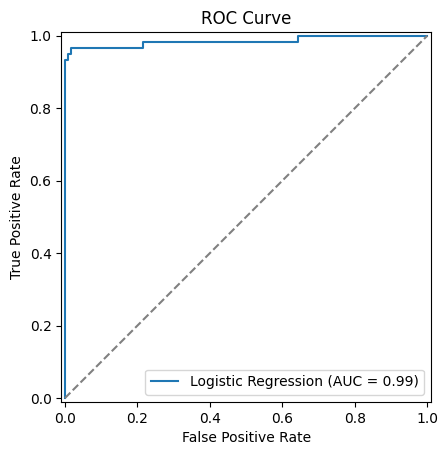

In [18]:
f = RocCurveDisplay.from_estimator(model, X_test, y_test, name='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Text(0.5, 23.52222222222222, 'Predicted')

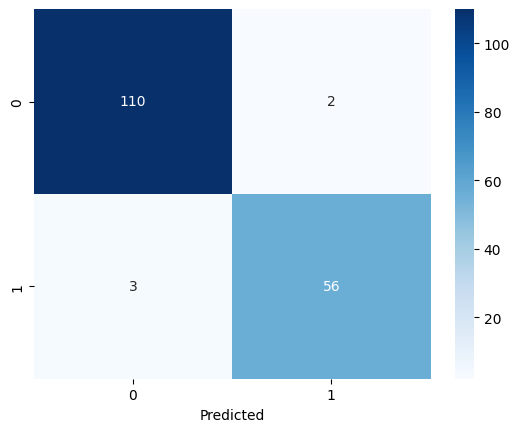

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')

In [20]:
# Get probabilities for class 1 (malignant)
y_probs = model.predict_proba(X_test)[:, 1]  # [:, 1] selects probability for class 1


threshold = 0.85

y_pred_threshold = (y_probs > threshold).astype(int)


score(y_test, y_pred_threshold)

0.9707602339181286
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       112
           1       1.00      0.92      0.96        59

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[112   0]
 [  5  54]]
0.9576271186440678


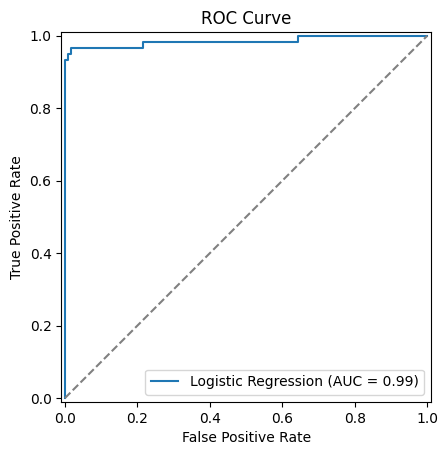

In [21]:
RocCurveDisplay.from_predictions(y_test, y_probs, name='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Text(0.5, 23.52222222222222, 'Predicted')

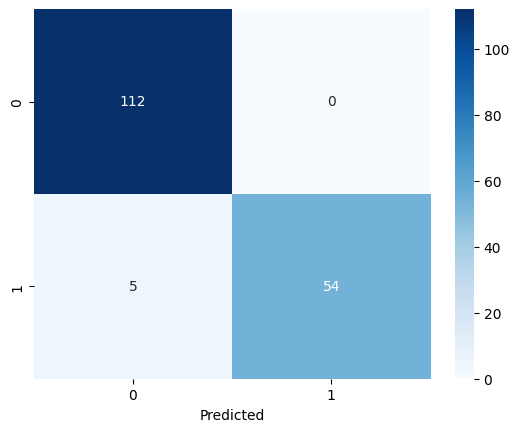

In [22]:
# Confusion Matrix with threshold
sns.heatmap(confusion_matrix(y_test, y_pred_threshold), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')

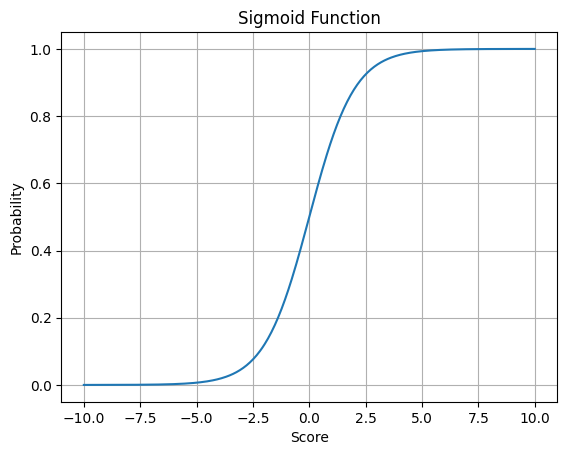

In [23]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


x = np.linspace(-10, 10, 400)
y = sigmoid(x)


plt.plot(x, y)
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()
